<a href="https://colab.research.google.com/github/irbaadika/PCVK_Genap_2023/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount to drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import library

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [3]:
img = cv.imread('/content/drive/MyDrive/ASSETS-PVCK/Images/noises/1.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [4]:
# MEDIAN FILTERING

def MedianFilter(image, filter_size):
    # membuat array kosong
    output = np.zeros(image.shape, np.uint8)

    # membuat array kernel filter
    filter_array = [image[0][0]] * filter_size

    # 3 x 3 median filter
    for j in range(1, image.shape[0]-1):
      for i in range(1, image.shape[1]-1):
        filter_array[0] = image[j-1, i-1]
        filter_array[1] = image[j, i-1]
        filter_array[2] = image[j+1, i-1]
        filter_array[3] = image[j-1, i]
        filter_array[4] = image[j, i]
        filter_array[5] = image[j+1, i]
        filter_array[6] = image[j-1, i+1]
        filter_array[7] = image[j, i+1]
        filter_array[8] = image[j+1, i+1]

        # mengurutkan array
        filter_array.sort()

        # masukkan median ke output array
        output[j][i] = filter_array[4]
    return output

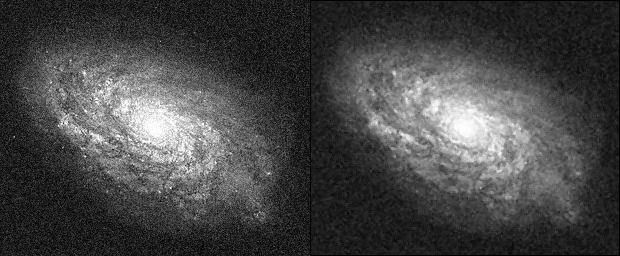

In [5]:
# panggil fungsi median filter dan tampilkan gambar

median = MedianFilter(img_gray, 9)
final_frame = cv.hconcat((img_gray, median))
cv2_imshow(final_frame)

In [6]:
# MEAN FILTERING

def MeanFilter(image, filter_size):
    # membuat array kosong
    output = np.zeros(image.shape, np.uint8)

    # membuat variabel kosong
    result = 0

    # 3 x 3 mean filter
    for j in range(1, image.shape[0]-1):
      for i in range(1, image.shape[1]-1):
        for y in range(-1, 2):
          for x in range(-1, 2):
            result = result + image[j+y, i+x]
        output[j][i] = int(result / filter_size)
        result = 0

    return output

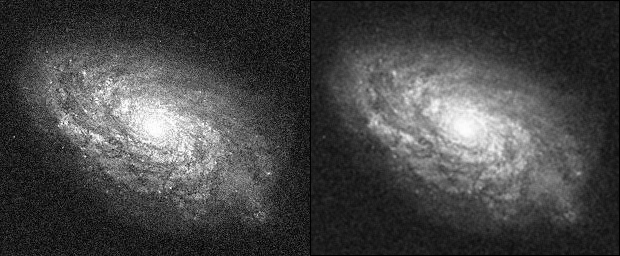

In [7]:
# panggil fungsi mean filter dan tampilkan gambar

mean = MeanFilter(img_gray, 9)
final_frame = cv.hconcat((img_gray, mean))
cv2_imshow(final_frame)

In [8]:
# MODE FILTERING

def ModeFilter(image, filter_size):
    # membuat array kosong
    output = np.zeros(image.shape, dtype=np.uint8)

    # membuat padding pada citra input
    pad_width = filter_size // 2
    padded_image = np.pad(image, pad_width, mode='constant')

    # iterasi pada setiap piksel citra input
    for i in range(pad_width, padded_image.shape[0] - pad_width):
        for j in range(pad_width, padded_image.shape[1] - pad_width):
            # membuat array kosong untuk piksel-piksel di dalam filter
            values = np.zeros(filter_size * filter_size, dtype=np.uint8)
            k = 0
            # iterasi pada setiap piksel di dalam filter
            for x in range(-pad_width, pad_width + 1):
                for y in range(-pad_width, pad_width + 1):
                    values[k] = padded_image[i + x, j + y]
                    k += 1
            # mencari nilai modus dari piksel-piksel di dalam filter
            mode_value = np.bincount(values).argmax()
            # menempatkan nilai modus ke dalam citra output
            output[i - pad_width, j - pad_width] = mode_value

    return output

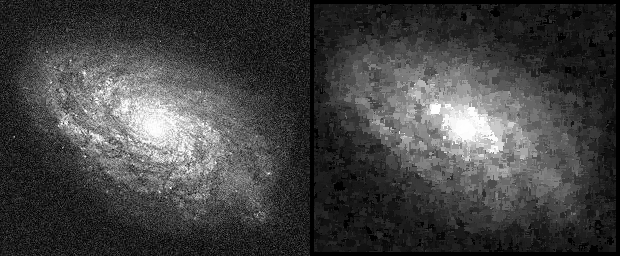

In [9]:
# panggil fungsi mode filter dan tampilkan gambar

mode = ModeFilter(img_gray, 9)
final_frame = cv.hconcat((img_gray, mode))
cv2_imshow(final_frame)

In [22]:
# CONVOLUTION

def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  image_height, image_width = image.shape

  output_height = (image_height - kernel_height) // stride + 1
  output_width = (image_width - kernel_width) // stride + 1

  image_after = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      image_after[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
      
  return image_after

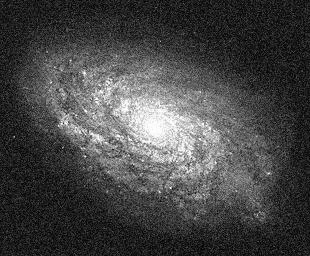

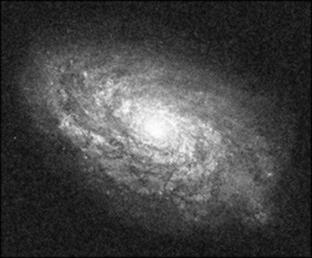

In [32]:
# LOW PASS FILTERING

# kernel Low Pass Filter
LPF = np.array([
    [1, 1, 1],
    [1, 4, 1],
    [1, 1, 1]
]) / 12

result = convolution2d(img_gray, LPF, 1, 2)
cv2_imshow(img_gray)
cv2_imshow(result)

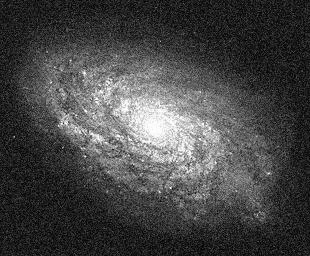

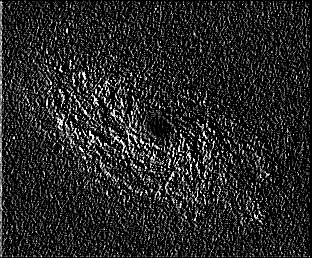

In [33]:
# HIGH PASS FILTERING

# kernel High Pass Filter
HPF = np.array([
    [-1, 0, 1],
    [-1, 0, 3],
    [-3, 0, 1]
])

result = convolution2d(img_gray, HPF, 1, 2)
cv2_imshow(img_gray)
cv2_imshow(result)